In [3]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

from astropy.io import ascii, fits
from astropy.io.fits import getdata

import glob

In [19]:
def graphAPOSpectra():
    
    M82 = {'blue':'M82_spec.0006b_CALSPEC.fits','red':'M82_spec.0006r_CALSPEC.fits'}
    M82Rot = {'blue':'M82_90Rot.0020b_CALSPEC.fits','red':'M82_90Rot.0020r_CALSPEC.fits'}
    Quasar = {'blue':'Quasar1_15.0003b_CALSPEC.fits','red':'Quasar1_15.0003r_CALSPEC.fits'}
    
    plt.style.use('fivethirtyeight')
    
    # set up figure 
    f, axs = plt.subplots(3, sharex=True, figsize=(20,20))
    f.set_facecolor('white')
    f.canvas.set_window_title("APO Spectra")
    
    for ax in axs:
        ax.yaxis.grid(False)
        ax.xaxis.grid(False)
    
    xmin = 0.35
    xmax = 1.0
    axs[-1].set_xlim(xmin,xmax)
    axs[-1].set_xticks(np.arange(xmin+.05, xmax, .1))
    axs[-1].set_xlabel('Wavelength ($\mu m$)', size=20)
    axs[0].set_title("APO Spectra",y=1.1, size=28, weight='bold')
    axs[0].text(.93,4.1*10**-15,"Brasseur,Busch,Serigano",size=10) # fragile, if plot changes, must fix
    
    # Adding absorption and emission lines # SHOULD WE LABEL THESE?
    # CHANGE THESE, THESE ARE NOT THE RIGHT LINES
    lines = [(.656461, "H alpha\nN II"),
            (.6583, ""),
            (.671829, "S II"),
            (.4959, "O III"),
            (.3727, "O II"),
            (.822696, "O II"),
            (.759370, "O II"),
            (.686719, "O II")]
    
    for p in range(3):
        for l in lines:
            axs[p].axvline(l[0],linestyle='--',linewidth=2,color='#8b8b8b')
            axs[p].text(l[0]+.001,2*10**-15,l[1],size=14,weight='bold')
            
    # Quasar
    axs[0].set_ylabel("Quasar Emission (Flux)")
    quasarBluTab = fits.getdata(Quasar['blue'])
    quasarBlu = quasarBluTab[(quasarBluTab['Wavelength'] > 3500) & (quasarBluTab['Wavelength'] < 5175)]
    quasarRed = fits.getdata(Quasar['red'])
    axs[0].plot(quasarBlu['Wavelength']*10**-4,quasarBlu['Flux'],'#4f9065')
    axs[0].plot(quasarRed['Wavelength']*10**-4,quasarRed['Flux'],'#6d904f')
    axs[0].set_ylim((-2*10**-15,4*10**-15))
    
    # M82 Rot
    axs[1].set_ylabel("M82 Rotated Emission (Flux)")
    m82RotBluTab = fits.getdata(M82Rot['blue'])
    m82RotBlu = m82RotBluTab[(m82RotBluTab['Wavelength'] > 3500) & (m82RotBluTab['Wavelength'] < 5175)]
    m82RotRed = fits.getdata(M82Rot['red'])
    axs[1].plot(m82RotBlu['Wavelength']*10**-4,m82RotBlu['Flux'],'#a905a2')
    axs[1].plot(m82RotRed['Wavelength']*10**-4,m82RotRed['Flux'],'#a90548')
    axs[1].set_ylim((-0.5*10**-14,3*10**-14))
    
    # M82
    axs[2].set_ylabel("M82 Emission (Flux)")
    m82BluTab = fits.getdata(M82['blue'])
    m82Blu = m82BluTab[(m82BluTab['Wavelength'] > 3500) & (m82BluTab['Wavelength'] < 5175)]
    m82Red = fits.getdata(M82['red'])
    axs[2].plot(m82Blu['Wavelength']*10**-4,m82Blu['Flux'],'#00c5d5')
    axs[2].plot(m82Red['Wavelength']*10**-4,m82Red['Flux'],'#008fd5')
    axs[2].set_ylim((-3*10**-15,3*10**-15))
  

    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)   
    plt.tight_layout()    
    plt.savefig('APOspectra.pdf',facecolor=f.get_facecolor())
    plt.show()
    
    
    

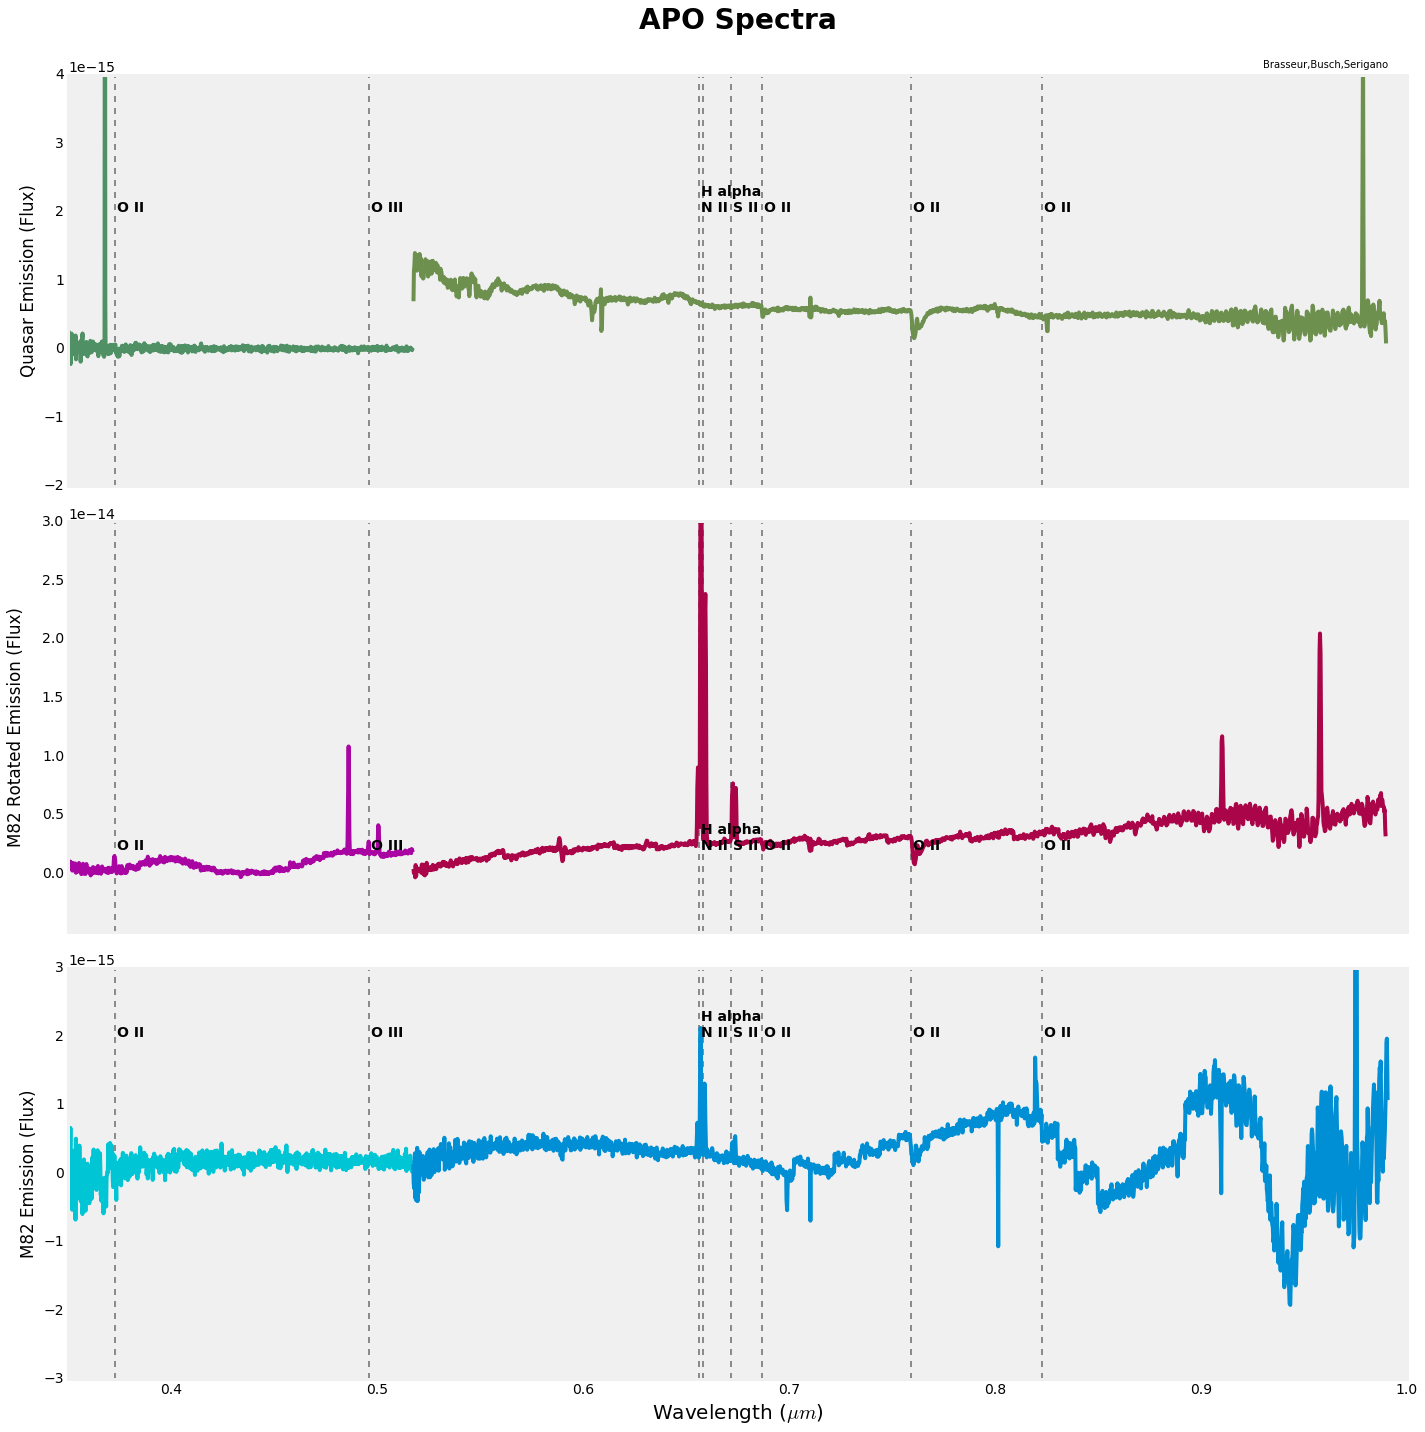

In [20]:
graphAPOSpectra()